# Worksheet 12

Name: Youxuan Ma

UID: U23330522

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

- Examples (1) and (3) demonstrate classification tasks, because they involve categorizing inputs into discrete labels based on the given features. 
- In contrast, examples (2) and (4) are not classification tasks as they involve predicting continuous outcomes.

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

I would set things up step by step as followings:

1. Dataset Preliminary Steps
- Clean the Data
- Feature Selection
- Feature Scaling/Normalization

2. Splitting the Dataset
- Training and Test Split:
    - Divide dataset into a training set and a test set. A common split ratio is 70% (training) to 30% (test), although this can vary based on the size and specifics of the dataset.

3. Cross-validation
- K-Fold Cross-validation:
    - One of the most common methods is K-Fold cross-validation. Here, the data is randomly divided into 'K' equal folds. The model is trained on 'K-1' folds and tested on the remaining fold. This process is repeated 'K' times (folds), with each fold being used exactly once as the test set. Finally, the model's performance is averaged over the 'K' trials to get a more comprehensive idea of how the model might perform on unseen data.

4. Model Training and Validation
- Hyperparameter Tuning
- Evaluation on the Test Set
- Using the Evaluation to Predict Performance

5. Conclusion and Iteration
- Based on the model's performance on the test set, revisit some of the earlier steps to improve the model further and iteratively.


c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

1. Underfitting occurs when a model is too simple to capture the underlying structure of the data. It can't even perform well on the training data, which means it's also unable to generalize well to unseen data.
- Signs to look for:
    1. Poor Performance on Training Data
    2. Simplistic Model Relative to the Data Complexity   
    3. Comparable Poor Performance on Both Training and Validation/Test Data
    4. No Improvement or Marginal Improvement with More Training

2. Overfitting occurs when a model learns both the underlying trends and the noise in the training dataset to an extent where it performs exceptionally well on the training data but fails to generalize to unseen data. Essentially, the model becomes too complex, capturing spurious correlations that don’t actually exist in the broader dataset.
- Signs to look for:
    1. High Training Accuracy but Low Validation/Test Accuracy   
    2. Complex Model Structure with Many Parameters  
    3. Significant Improvement in Training Performance with No Equivalent Improvement on Validation/Test Data
    4. Sensitivity to Small Fluctuations in the Training Data
    5. Model Learns Detailed Features Irrelevant to the Task

### K Nearest Neighbors

In [66]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

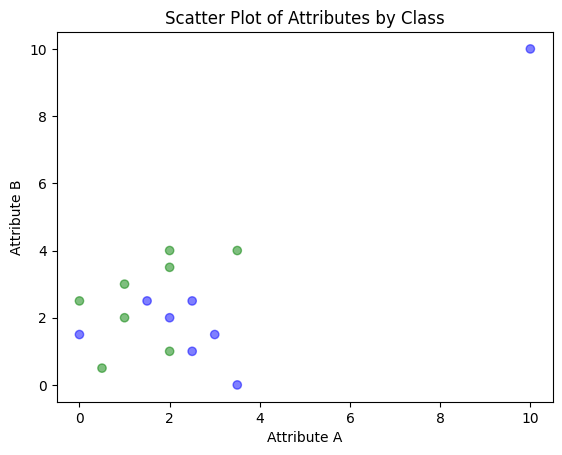

In [67]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(np.array(data["Attribute A"]), np.array(data["Attribute B"]), color=colors[data["Class"]].tolist(), alpha=0.5)
plt.title('Scatter Plot of Attributes by Class')
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

As we see, the point (10, 10) is very likely an outlier, and we will remove it from the dataset as follow.

Outlier Points:
Index: 15, Attribute A: 10, Attribute B: 10, Class: 0


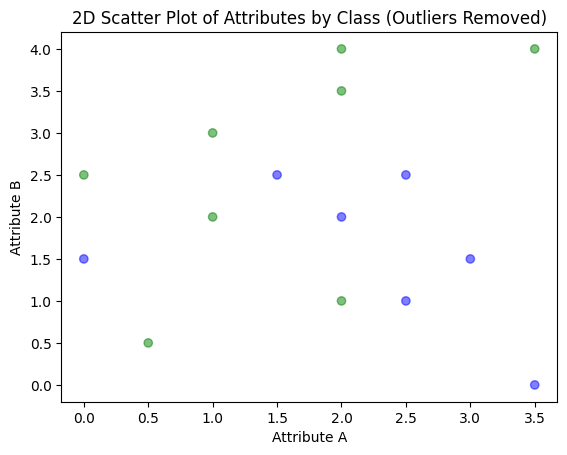

In [68]:
attribute_a = np.array(data["Attribute A"])
attribute_b = np.array(data["Attribute B"])
classes = np.array(data["Class"])

Q1_a, Q3_a = np.percentile(attribute_a, [25, 75])
IQR_a = Q3_a - Q1_a

Q1_b, Q3_b = np.percentile(attribute_b, [25, 75])
IQR_b = Q3_b - Q1_b

outlier_indices_a = np.where((attribute_a < (Q1_a - 1.5 * IQR_a)) | (attribute_a > (Q3_a + 1.5 * IQR_a)))
outlier_indices_b = np.where((attribute_b < (Q1_b - 1.5 * IQR_b)) | (attribute_b > (Q3_b + 1.5 * IQR_b)))

outlier_indices = np.unique(np.concatenate((outlier_indices_a, outlier_indices_b)))

print("Outlier Points:")
for index in outlier_indices:
    print(f"Index: {index}, Attribute A: {data['Attribute A'][index]}, Attribute B: {data['Attribute B'][index]}, Class: {data['Class'][index]}")

clean_attribute_a = np.delete(attribute_a, outlier_indices)
clean_attribute_b = np.delete(attribute_b, outlier_indices)
clean_classes = np.delete(classes, outlier_indices)

plt.scatter(clean_attribute_a, clean_attribute_b, color=colors[clean_classes], alpha=0.5)
plt.title('2D Scatter Plot of Attributes by Class (Outliers Removed)')
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.show()


Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

The point (0, 1.5) might be a noise point, since it's far from the points of its own class and is very close to the points of the other class.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

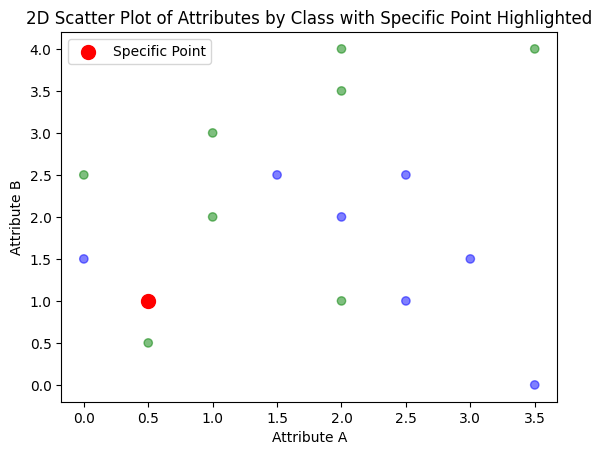

In [69]:
specific_point_a = 0.5
specific_point_b = 1

plt.scatter(clean_attribute_a, clean_attribute_b, color=colors[clean_classes], alpha=0.5)

plt.scatter(specific_point_a, specific_point_b, color='red', s=100, label='Specific Point')

plt.title('2D Scatter Plot of Attributes by Class with Specific Point Highlighted')
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.legend()
plt.show()


e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

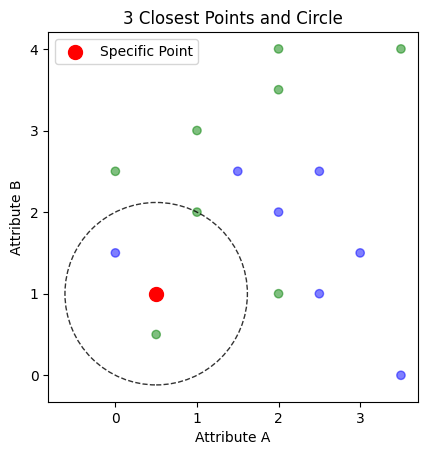

In [70]:
dataset_points = np.column_stack((clean_attribute_a, clean_attribute_b))

def n_closest_to(example, n, dataset):
    distances = np.sqrt(((dataset - example) ** 2).sum(axis=1))
    closest_indices = np.argsort(distances)[:n]
    return closest_indices, distances[closest_indices]

location = (0.5, 1)  
n = 3

closest_indices, closest_distances = n_closest_to(location, n, dataset_points)

radius = np.max(closest_distances)

_, axes = plt.subplots()

axes.scatter(clean_attribute_a, clean_attribute_b, color=colors[clean_classes], alpha=0.5)

axes.scatter(*location, color='r', s=100, label='Specific Point')

cir = plt.Circle(location, radius, color='black', fill=False, alpha=0.8, linestyle='--')
axes.add_patch(cir)
axes.set_aspect('equal')
plt.legend()
plt.title('3 Closest Points and Circle')
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')

plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [71]:
def majority(indices):

    closest_classes = clean_classes[indices]
    class_counts = np.bincount(closest_classes)
    max_count = np.max(class_counts)
    tied_classes = np.where(class_counts == max_count)[0]
    
    if len(tied_classes) > 1:
        selected_class = tied_classes[0]
    else:
        selected_class = np.argmax(class_counts)
    
    return selected_class

maj_class = majority(closest_indices)

print(f"The majority class among the closest points to {location} is: {maj_class}.")
print(f"Therefore, the class assigned to this new point is: {maj_class}.")


The majority class among the closest points to (0.5, 1) is: 1.
Therefore, the class assigned to this new point is: 1.


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [72]:
count = 0
num_data = len(dataset_points)
k = 3

for i in range(num_data):
    training_points = np.delete(dataset_points, i, axis=0)
    training_classes = np.delete(clean_classes, i)

    actual_class = clean_classes[i]
    current_point = dataset_points[i]

    cls_ind, _ = n_closest_to(current_point, k, training_points)

    prediction = majority(cls_ind)
    
    if prediction == actual_class:
        count += 1

accuracy = count / num_data

print(f"overall accuracy = {accuracy:.2f}")

overall accuracy = 0.60


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [73]:
from sklearn.model_selection import train_test_split


b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

In [74]:
from sklearn.neighbors import KNeighborsClassifier


c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

In [75]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(dimensionality_reduction, knn_model)
model.fit(...)

NameError: name 'dimensionality_reduction' is not defined

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below